In [22]:
# clear variables
%reset -f

# libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import pandas as pd
from IPython.display import display
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Read Data
data = np.load('array_data/data_64.npy',allow_pickle=True)
labels = np.load('array_data/labels.npy',allow_pickle=True)

# Scale Data
scale_data = StandardScaler().fit_transform(data)

# Delete
del data

In [23]:
# Comparing Classifiers: Tuned Models 

# PCA
def pca(x_train, x_test, y_train):  
    # PCA
    pca = PCA(n_components=10, random_state=1)
    # fit
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)
    # plot
    plot = plt.scatter(x_train[:,0], 
                       x_train[:,1], 
                       c=y_train,
                      s=5)
    plt.legend(handles=plot.legend_elements()[0], 
               labels=['No Finding','Finding'])
    plt.xlabel('1st Component')
    plt.ylabel('2nd Component')
    plt.title('PCA: Training Data')
    plt.show()
    return x_train, x_test

# Tuned Models
# ANN
def ann(x, y, test):
    print('Fitting ANN...')
    ## fit model
    ann = MLPClassifier(solver='adam',
                        hidden_layer_sizes=(200,),
                        alpha=0.001,
                        activation='tanh',
                        random_state=1,
                       max_iter=1000)    
    ann.fit(x, y)
    ## predict
    ann_pred = ann.predict(test)
    return ann_pred

# KNN
def knn(x, y, test):
    print('Fitting KNN...')
    ## fit 
    knn = KNeighborsClassifier(weights='uniform',
                               p=1,
                               n_neighbors=202)
    knn.fit(x, y)
    ## predict
    knn_pred = knn.predict(test)
    return knn_pred

# SVM
def svm(x, y, test):
    print('Fitting SVM...')
    ## fit model
    svm = SVC(shrinking=False,
              kernel='poly',
              degree=3,
              decision_function_shape='ovr',
              C=1,
              random_state=1)
    svm.fit(x, y)
    ## predict
    svm_pred = svm.predict(test)
    return svm_pred

# Logistic Regression
def log_reg(x, y, test):
    print('Fitting Logistic Regression...')
    ## fit model
    log_reg = LogisticRegression(solver='sag',
                                 penalty='l2',
                                 C=1,
                                random_state=1,
                                max_iter=1000)
    log_reg.fit(x, y)
    ## predict
    log_pred = log_reg.predict(test)
    return log_pred

# Naive Bayes
def bayes(x, y, test):
    print('Fitting Naive Bayes...')
    ## fit model
    bayes = GaussianNB(var_smoothing=0.1)
    bayes.fit(x, y)
    ## predict
    bayes_pred = bayes.predict(test)    
    return bayes_pred

# Gradient Boosting
def grad_boost(x, y, test):
    print('Fitting Gradient Boosting...')
    ## fit model
    grad = AdaBoostClassifier(n_estimators=200,
                              learning_rate=0.1,
                              random_state=1)
    grad.fit(x, y)
    ## predict
    grad_pred = grad.predict(test)
    return grad_pred

# K-Means
def kmeans(x,y):
    print('Fitting K-Means...')
    # K-Means
    kmeans = KMeans(n_init=30,
                     n_clusters=2,
                     algorithm='full',
                     random_state=1)
    kmeans.fit(x)
    ## labels
    cluster_labels = kmeans.labels_
    k_labels = np.zeros(cluster_labels.shape)    
    ## infer
    if sum(cluster_labels[np.where(y==0)[0]]) < sum(cluster_labels[np.where(y==1)[0]]):
        k_labels[cluster_labels == 0] = 0
        k_labels[cluster_labels == 1] = 1
    else:
        k_labels[cluster_labels == 0] = 1
        k_labels[cluster_labels == 1] = 0
    ## performance
    perf(y, k_labels)
    return k_labels

# Performance
def perf(pred, real):
    print('Confusion Matrix')
    # confusion matrix
    conf_mat = confusion_matrix(real,pred)
    display(pd.DataFrame(conf_mat))
    print('Classification Report')
    # classificaiton report
    class_rep = classification_report(real,pred,output_dict=True)
    display(pd.DataFrame(class_rep))

# ROC Curves
def roc_curves(pred_list, class_list, real):
    colors = plt.cm.tab10(np.linspace(0, 1, len(pred_list)))
    for pred, title, c in zip(pred_list,class_list, colors):
        # ROC Curve
        fpr, tpr, threshold = roc_curve(real, pred)
        # AUC
        roc_auc = auc(fpr, tpr)
        # plot
        plt.plot(fpr, tpr, 'b', 
                 label = str(title+': AUC = %0.2f' % roc_auc),
                c=c)
    # plot features
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Full Implementation
def run(model,x_train,y_train,x_test,y_test):
    # Fit and Predict
    pred = model(x_train, y_train, x_test)
    # Examine Performance
    perf(y_test, pred)
    return pred


Non-PCA Data
Fitting ANN...
Confusion Matrix


,0,1
0,544,191
1,247,600


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.687737,0.758534,0.723135,0.723135,0.725641
recall,0.740136,0.708383,0.723135,0.724259,0.723135
f1-score,0.712975,0.732601,0.723135,0.722788,0.723483
support,735.000000,847.000000,0.723135,1582.000000,1582.000000


Fitting KNN...
Confusion Matrix


,0,1
0,547,206
1,244,585


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.691530,0.739570,0.71555,0.715550,0.716704
recall,0.726428,0.705669,0.71555,0.716049,0.715550
f1-score,0.708549,0.722222,0.71555,0.715386,0.715714
support,753.000000,829.000000,0.71555,1582.000000,1582.000000


Fitting SVM...
Confusion Matrix


,0,1
0,562,166
1,229,625


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.710493,0.790139,0.750316,0.750316,0.753488
recall,0.771978,0.731850,0.750316,0.751914,0.750316
f1-score,0.739961,0.759878,0.750316,0.749919,0.750713
support,728.000000,854.000000,0.750316,1582.000000,1582.000000


Fitting Logistic Regression...
Confusion Matrix


/Users/joshtkraus/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,0,1
0,488,302
1,303,489


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.616941,0.618205,0.617573,0.617573,0.617573
recall,0.617722,0.617424,0.617573,0.617573,0.617573
f1-score,0.617331,0.617814,0.617573,0.617573,0.617573
support,790.000000,792.000000,0.617573,1582.000000,1582.000000


Fitting Naive Bayes...
Confusion Matrix


,0,1
0,496,200
1,295,591


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.627054,0.747155,0.687105,0.687105,0.694317
recall,0.712644,0.667043,0.687105,0.689843,0.687105
f1-score,0.667115,0.704830,0.687105,0.685973,0.688237
support,696.000000,886.000000,0.687105,1582.000000,1582.000000


Fitting Gradient Boosting...
Confusion Matrix


,0,1
0,556,211
1,235,580


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.702908,0.733249,0.718078,0.718078,0.718539
recall,0.724902,0.711656,0.718078,0.718279,0.718078
f1-score,0.713736,0.722291,0.718078,0.718013,0.718143
support,767.000000,815.000000,0.718078,1582.000000,1582.000000


Fitting K-Means...
Confusion Matrix


,0,1
0,417,337
1,374,454


Classification Report


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.527181,0.573957,0.550569,0.550569,0.551663
recall,0.553050,0.548309,0.550569,0.550680,0.550569
f1-score,0.539806,0.560840,0.550569,0.550323,0.550815
support,754.000000,828.000000,0.550569,1582.000000,1582.000000


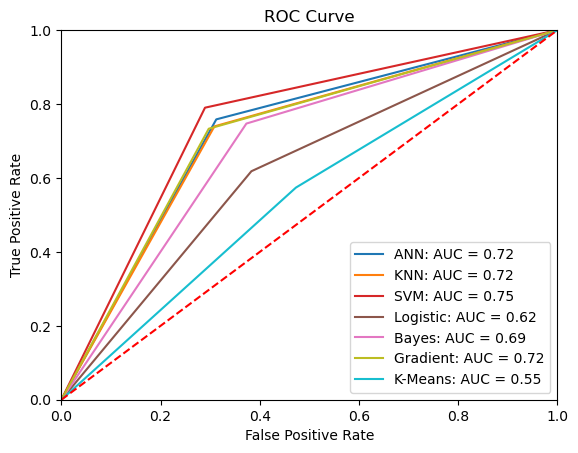

In [24]:
# No Finding vs. Effusion, Balanced

# Subset Infiltration & No Finding
## subset
data_sub = scale_data[:,np.where((labels=='No Finding')|(labels=='Effusion'))[0]]
label_sub = labels[np.where((labels=='No Finding')|(labels=='Effusion'))[0]]
## convert response to binary
label_bin = np.where(label_sub == 'No Finding', 0, 1)

# Delete
del label_sub, scale_data, labels

# Balance (Undersampliung)
## separate
no_finding = np.where(label_bin==0)[0]
finding = np.where(label_bin==1)[0]
## set seed
np.random.seed(1)
## under sample
no_finding = np.random.choice(no_finding,
                              len(finding),
                              replace=False)
## indicies
ind = np.append(no_finding,finding)
## balance
data_small = data_sub[:,ind]
label_small = label_bin[ind]

# Delete
del no_finding, finding, ind, data_sub, label_bin

# Split Data
(x_train,x_test,
y_train,y_test) = train_test_split(data_small.T,label_small, 
                                       test_size=0.2, random_state=1,
                                       shuffle=True,stratify=label_small)

# Delete
del data_small, label_small

# Non-PCA Fitting (higher accuracy, slower computation)
print('Non-PCA Data')
# ANN
ann_pred = run(ann,x_train,y_train,x_test,y_test)
# KNN
knn_pred = run(knn,x_train,y_train,x_test,y_test)
# SVM
svm_pred = run(svm,x_train,y_train,x_test,y_test)
# Logistic Regression
log_pred = run(log_reg,x_train,y_train,x_test,y_test)
# Bayes
bayes_pred = run(bayes,x_train,y_train,x_test,y_test)
# Gradient Boosting
grad_pred = run(grad_boost,x_train,y_train,x_test,y_test)
# K-Means
kmeans_pred = kmeans(x_test,y_test)
# Plot ROC
pred_list = [ann_pred,knn_pred,svm_pred,log_pred,bayes_pred,grad_pred,kmeans_pred]
class_list = ['ANN','KNN','SVM','Logistic','Bayes','Gradient','K-Means']
roc_curves(pred_list, class_list, y_test)

# Delete
del pred_list,ann_pred,knn_pred,svm_pred,log_pred,bayes_pred,grad_pred,kmeans_pred

PCA Data


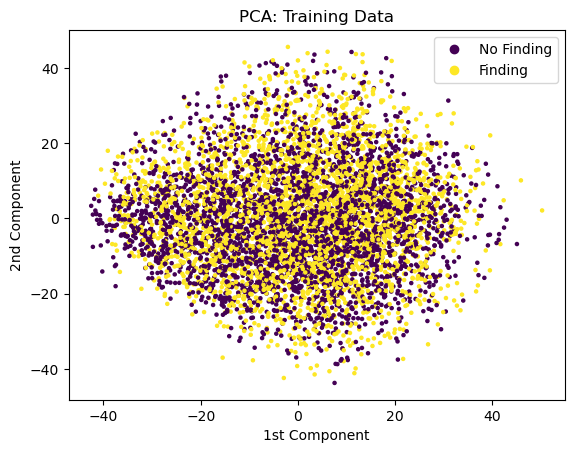

Fitting ANN...
Confusion Matrix


/Users/joshtkraus/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,0,1
0,436,289
1,355,502


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.551201,0.634640,0.59292,0.592920,0.596401
recall,0.601379,0.585764,0.59292,0.593572,0.592920
f1-score,0.575198,0.609223,0.59292,0.592211,0.593630
support,725.000000,857.000000,0.59292,1582.000000,1582.000000


Fitting KNN...
Confusion Matrix


,0,1
0,534,230
1,257,561


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.675095,0.709229,0.692162,0.692162,0.692744
recall,0.698953,0.685819,0.692162,0.692386,0.692162
f1-score,0.686817,0.697328,0.692162,0.692072,0.692252
support,764.000000,818.000000,0.692162,1582.000000,1582.000000


Fitting SVM...
Confusion Matrix


,0,1
0,497,217
1,294,574


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.628319,0.725664,0.676991,0.676991,0.681729
recall,0.696078,0.661290,0.676991,0.678684,0.676991
f1-score,0.660465,0.691983,0.676991,0.676224,0.677758
support,714.000000,868.000000,0.676991,1582.000000,1582.000000


Fitting Logistic Regression...
Confusion Matrix


,0,1
0,521,249
1,270,542


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.658660,0.685209,0.671934,0.671934,0.672287
recall,0.676623,0.667488,0.671934,0.672056,0.671934
f1-score,0.667521,0.676232,0.671934,0.671876,0.671992
support,770.000000,812.000000,0.671934,1582.000000,1582.000000


Fitting Naive Bayes...
Confusion Matrix


,0,1
0,500,221
1,291,570


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.632111,0.720607,0.676359,0.676359,0.680275
recall,0.693481,0.662021,0.676359,0.677751,0.676359
f1-score,0.661376,0.690073,0.676359,0.675724,0.676994
support,721.000000,861.000000,0.676359,1582.000000,1582.000000


Fitting Gradient Boosting...
Confusion Matrix


,0,1
0,522,242
1,269,549


Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.659924,0.694058,0.676991,0.676991,0.677574
recall,0.683246,0.671149,0.676991,0.677198,0.676991
f1-score,0.671383,0.682411,0.676991,0.676897,0.677085
support,764.000000,818.000000,0.676991,1582.000000,1582.000000


Fitting K-Means...
Confusion Matrix


,0,1
0,420,338
1,371,453


Classification Report


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.530973,0.572693,0.551833,0.551833,0.552703
recall,0.554090,0.549757,0.551833,0.551923,0.551833
f1-score,0.542285,0.560991,0.551833,0.551638,0.552028
support,758.000000,824.000000,0.551833,1582.000000,1582.000000


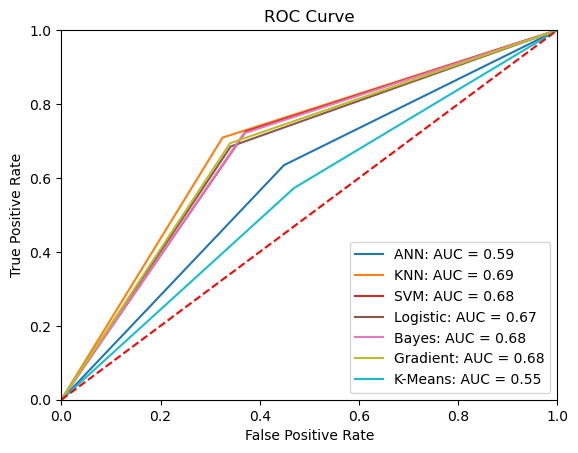

In [25]:
# PCA Fitting (lower accuracy, faster computation)
print('PCA Data')
# PCA
x_train_pca, x_test_pca = pca(x_train, x_test, y_train)

# Delete
del x_train, x_test

# ANN
ann_pred = run(ann,x_train_pca,y_train,x_test_pca,y_test)
# KNN
knn_pred = run(knn,x_train_pca,y_train,x_test_pca,y_test)
# SVM
svm_pred = run(svm,x_train_pca,y_train,x_test_pca,y_test)
# Logistic Regression
log_pred = run(log_reg,x_train_pca,y_train,x_test_pca,y_test)
# Bayes
bayes_pred = run(bayes,x_train_pca,y_train,x_test_pca,y_test)
# Gradient Boosting
grad_pred = run(grad_boost,x_train_pca,y_train,x_test_pca,y_test)
# K-Means
kmeans_pred = kmeans(x_test_pca,y_test)
# Plot ROC
pred_list = [ann_pred,knn_pred,svm_pred,log_pred,bayes_pred,grad_pred,kmeans_pred]
roc_curves(pred_list, class_list, y_test)

# Delete
del y_train, y_test, x_train_pca, x_test_pca